## Data understanding - Seatle AirBnB

In [37]:
#Importing standard liabraries for data exploration

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Uploading AirBnB data sets

calendar_df = pd.read_csv('calendar.csv')

listing_df = pd.read_csv('listings.csv')

reviews_df = pd.read_csv('reviews.csv')

In [39]:
# Rows with some of the missing values

no_nulls_listing = set(listing_df.columns[listing_df.isnull().mean()==0])

print(no_nulls_listing)

{'host_verifications', 'number_of_reviews', 'extra_people', 'guests_included', 'neighbourhood_cleansed', 'scrape_id', 'name', 'last_scraped', 'calendar_last_scraped', 'availability_90', 'require_guest_phone_verification', 'experiences_offered', 'description', 'city', 'calculated_host_listings_count', 'jurisdiction_names', 'picture_url', 'price', 'availability_60', 'cancellation_policy', 'require_guest_profile_picture', 'is_location_exact', 'requires_license', 'instant_bookable', 'listing_url', 'availability_30', 'country_code', 'minimum_nights', 'availability_365', 'street', 'smart_location', 'host_id', 'maximum_nights', 'state', 'bed_type', 'neighbourhood_group_cleansed', 'id', 'accommodates', 'longitude', 'market', 'host_url', 'calendar_updated', 'latitude', 'amenities', 'room_type', 'has_availability', 'country'}


In [40]:
# why some of the numeric vlaues are missing for host?

listing_df[['host_response_time','host_response_rate','host_acceptance_rate']].head(5)

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,96%,100%
1,within an hour,98%,100%
2,within a few hours,67%,100%
3,NaN,NaN,NaN
4,within an hour,100%,NaN


__follow up on host rating__

- convert response_rate and acceptance_rate into numeric values

In [41]:
# converting object % to float

def percentage_to_float(x):
        return float(x.strip('%')) / 100

In [42]:
# Converting response_rate and acceptance_rate into numeric values

listing_df['host_response_rate'] = listing_df['host_response_rate'].fillna('0%').apply(percentage_to_float)

listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].fillna('0%').apply(percentage_to_float)

In [43]:
# why some of the numeric vlaues are missing for price, fee and deposit?

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00


In [44]:
# converting financials to float

def financial_to_float(x):
        x = x.replace(",", "")
        return float(x.strip('$'))

In [45]:
# Converting response_rate and acceptance_rate into numeric values

financials = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']

for i in financials:
    listing_df[i] = listing_df[i].fillna('$0').apply(financial_to_float)

In [46]:
# Checking results

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,0.0,0.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,0.0,0.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,0.0,0.0,700.0,125.0


In [47]:
# Splitting for numeric and categorical variables

cat_listing_df = listing_df.select_dtypes(include=['object'])

var_listing_df = listing_df.select_dtypes(include=np.number)

In [49]:
# Looking into correlation between numeric variables. Removing irrelevant columns

listing_corr_clean = var_listing_df.drop(columns=['id','scrape_id','host_id','latitude',
                                                'longitude','license','host_listings_count',
                                               'calculated_host_listings_count',
                                               'host_total_listings_count'])

<AxesSubplot:>

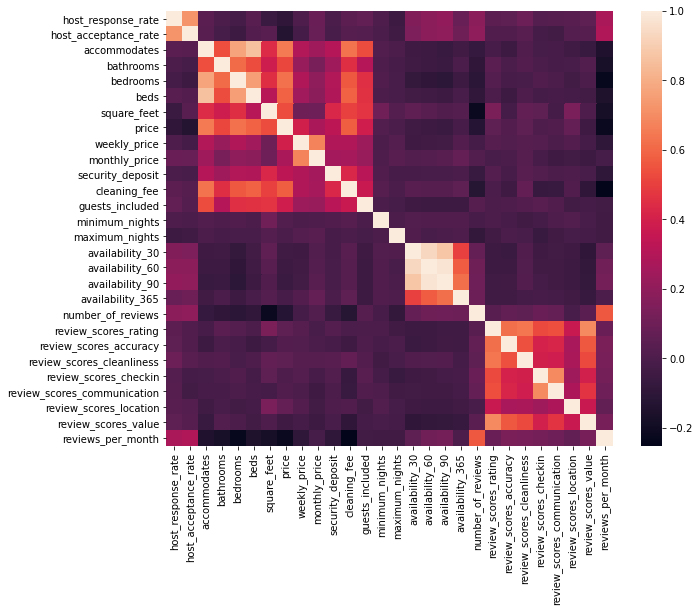

In [50]:
# Correlation heatmap

plt.subplots(figsize=(10,8))
sns.heatmap(listing_corr_clean.corr())

### Looking into listings correlations

__Host rate__

- host_response_rate
- host_acceptance_rate

interesting that response rate and acceptance rate are highly correlated: could be the case that hosts who response with their prospects are more likely accept their requests?

__Size of a property__

- accomadates
- bathrooms
- bedrooms
- beds
- guests included 
- square feet

potentially we can keep only: beds and square feet as these are the least correlated features and can compliment each other.

__Availability__

- availability_30
- availability_60
- availability_90
- availability_365

Interesting observation: all 30,60 & 90 days are highly correlated which tells potentially indicated that popular properties are always booked and less poppular are more likely to be available

__Reviews__

- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value 

potentially we can keep: review_scores_rating, review_scores_location and review_per_month as these are less corelated

## Looking into listings values distributions 

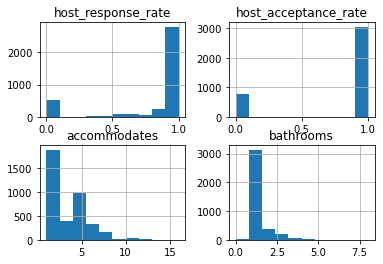

In [52]:
# We take a quick look to see what are the values distributions

listing_corr_clean.iloc[:, :4].hist();

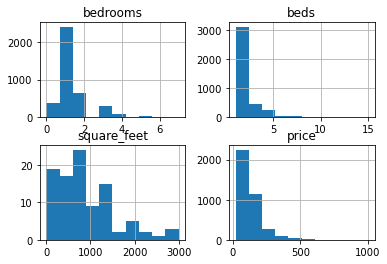

In [53]:
listing_corr_clean.iloc[:, 4:8].hist();

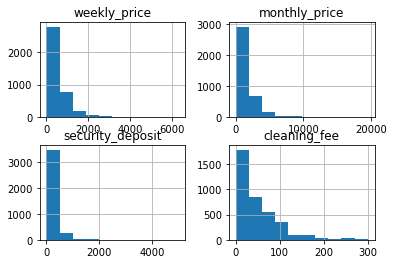

In [54]:
listing_corr_clean.iloc[:, 8:12].hist();

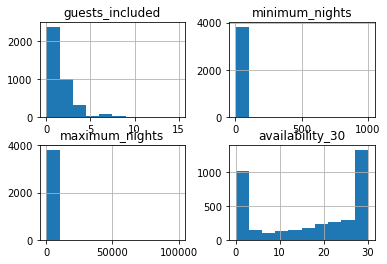

In [55]:
listing_corr_clean.iloc[:, 12:16].hist();

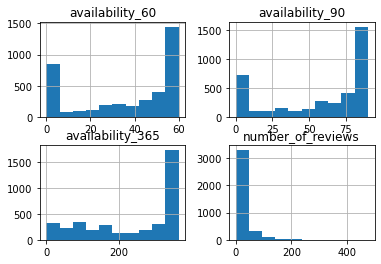

In [56]:
listing_corr_clean.iloc[:, 16:20].hist();

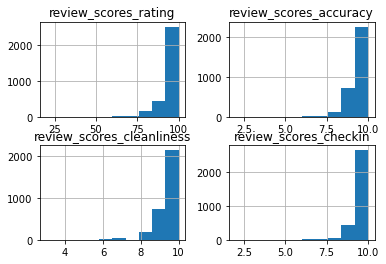

In [57]:
listing_corr_clean.iloc[:, 20:24].hist();

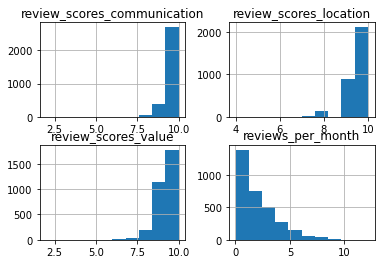

In [58]:
listing_corr_clean.iloc[:, 24:30].hist();
# we can't have histogram for cat values

### What is the busiest time of the year for Seattle?

In order to answer our first question we don't really need to build a sophisticated model but rather we can take a closer look into calendar data.

In [60]:
# Let's convert dates into month to identtify the busiest time of the year

import datetime as dt

calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['year'] = calendar_df['date'].dt.year

calendar_df.head(10)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,$85.00,1,2016
1,241032,2016-01-05,t,$85.00,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016
5,241032,2016-01-09,f,NaN,1,2016
6,241032,2016-01-10,f,NaN,1,2016
7,241032,2016-01-11,f,NaN,1,2016
8,241032,2016-01-12,f,NaN,1,2016
9,241032,2016-01-13,t,$85.00,1,2016


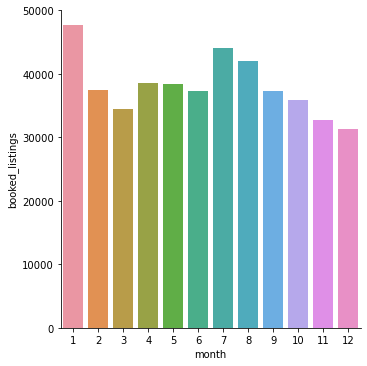

In [61]:
# We will focus only on year 2016 since we have only a single full year of data 
# Below we will look into total number of days per month booked across all properties in the Seatle

monthly_booked = calendar_df[(calendar_df['available']== 'f') & (calendar_df['year']== 2016)][['listing_id','month']].groupby(['month']).count()

monthly_booked = monthly_booked.reset_index()

monthly_booked.rename(columns={"listing_id": "booked_listings"}, inplace = True)

sns.catplot (x = 'month', y = 'booked_listings', data = monthly_booked , kind = 'bar')

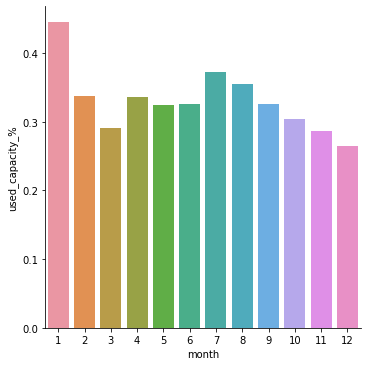

In [62]:
# Let's look into percentage of booked properties by month
# we can simply do it by dividing total 

capacity = calendar_df[calendar_df['year']== 2016][['listing_id','month']].groupby(['month']).count()

capacity = capacity.reset_index()

capacity.rename(columns={"listing_id": "total_listings"}, inplace = True)

capacity = capacity.merge(monthly_booked, left_on='month', right_on='month')

capacity['used_capacity_%'] = capacity['booked_listings'] / capacity['total_listings']

sns.catplot (x = 'month', y = 'used_capacity_%', data = capacity , kind = 'bar')

## What are the most expensive neighbourhoods ?

As with busiest time question we don't really need to build a model we will simply do minor data manipulations

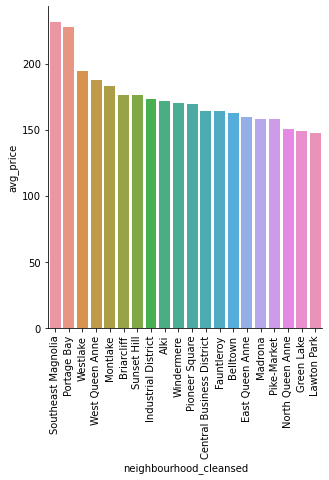

In [63]:
# Let's focus on neighbourhood_cleansed as this is neigbourhood row shows the most detailed description, 
# it also does not have any missing values.

avg_neighbourhood_price = listing_df[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean().reset_index()

# Let's take a look at top 20 most expensive neighbourhoods

top_20_neighbourhoods = avg_neighbourhood_price.nlargest(20, 'price', keep='first')

top_20_neighbourhoods.rename(columns={"price": "avg_price"}, inplace = True)

sns.catplot (x = 'neighbourhood_cleansed', y = 'avg_price', data = top_20_neighbourhoods , kind = 'bar')
plt.xticks(rotation=90);

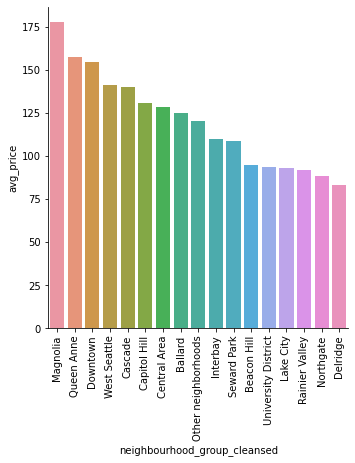

In [64]:
# Let's focus on neighbourhood_cleansed as this is neigbourhood row shows the most detailed description, 
# it also does not have any missing values.

avg_neighbourhood_price = listing_df[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').mean().reset_index()

# Let's take a look at top 20 most expensive neighbourhoods_grouped

top_20_neighbourhoods = avg_neighbourhood_price.nlargest(20, 'price', keep='first')

top_20_neighbourhoods.rename(columns={"price": "avg_price"}, inplace = True)

sns.catplot (x = 'neighbourhood_group_cleansed', y = 'avg_price', data = top_20_neighbourhoods , kind = 'bar')
plt.xticks(rotation=90);

## Looking into geo unique features

In [80]:
listing_df['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [67]:
listing_df['neighbourhood'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [68]:
listing_df['market'].unique()

array(['Seattle'], dtype=object)

In [69]:
# Seems like this is quite important feature

listing_df['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [70]:
listing_df['smart_location'].unique()

array(['Seattle, WA', 'Ballard, Seattle, WA', 'West Seattle, WA',
       'Seattle , WA', '西雅图, WA', 'Phinney Ridge Seattle, WA',
       'seattle, wa'], dtype=object)

## Looking into missing values

In [72]:
# calculating % of missing values
missing_listings_df = listing_df.isnull().mean()*100

# filtering results for columns with missing values
columns_with_missing_listings = missing_listings_df[missing_listings_df>0]

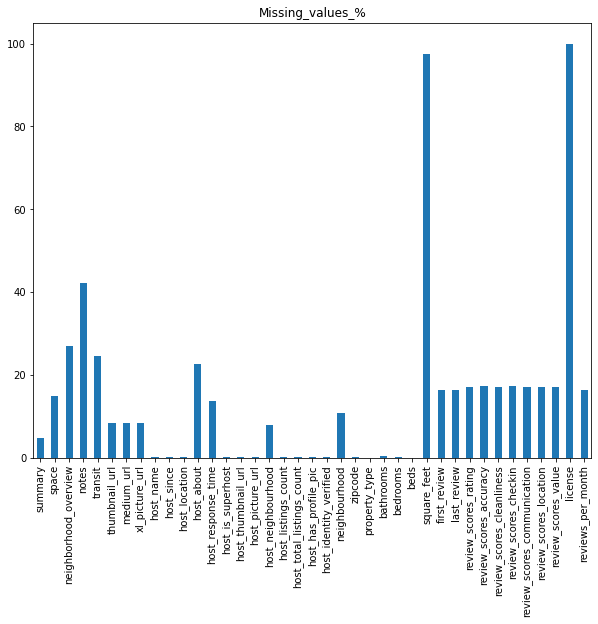

In [77]:
# plotting results 
plt.subplots(figsize=(10,8))
columns_with_missing_listings.plot.bar(title = 'Missing_values_%');

Luckily for us there are few values missing that we've shorlisted for main question of price prediction:

square_feet - with at almost 100% missing

review_scores_rating, review_scores_location, reviews_per_month with almost 20% missing.

Reviews missing are likely to be new properties with few ranking - these could be candidates for imputing.